In [3]:
# Credit Status Check
# Libraries to import
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data
df = pd.read_csv('/content/credit.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Preprocessing

In [18]:
# Data preprocessing
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# Let's drop NaN values
df = df.dropna() # done

In [20]:
# Label encoding
df.replace({"Loan_Status" : {'N':0, 'Y':1}}, inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [33]:
df = df.replace(to_replace='3+', value=4)
df.replace({'Married':{'No':0, 'Yes':1}, 'Gender':{'Male':1, 'Female':0}, 'Self_Employed':{'No':0, 'Yes':1},
                      'Property_Area':{"Rural":0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)

# Data Visualization

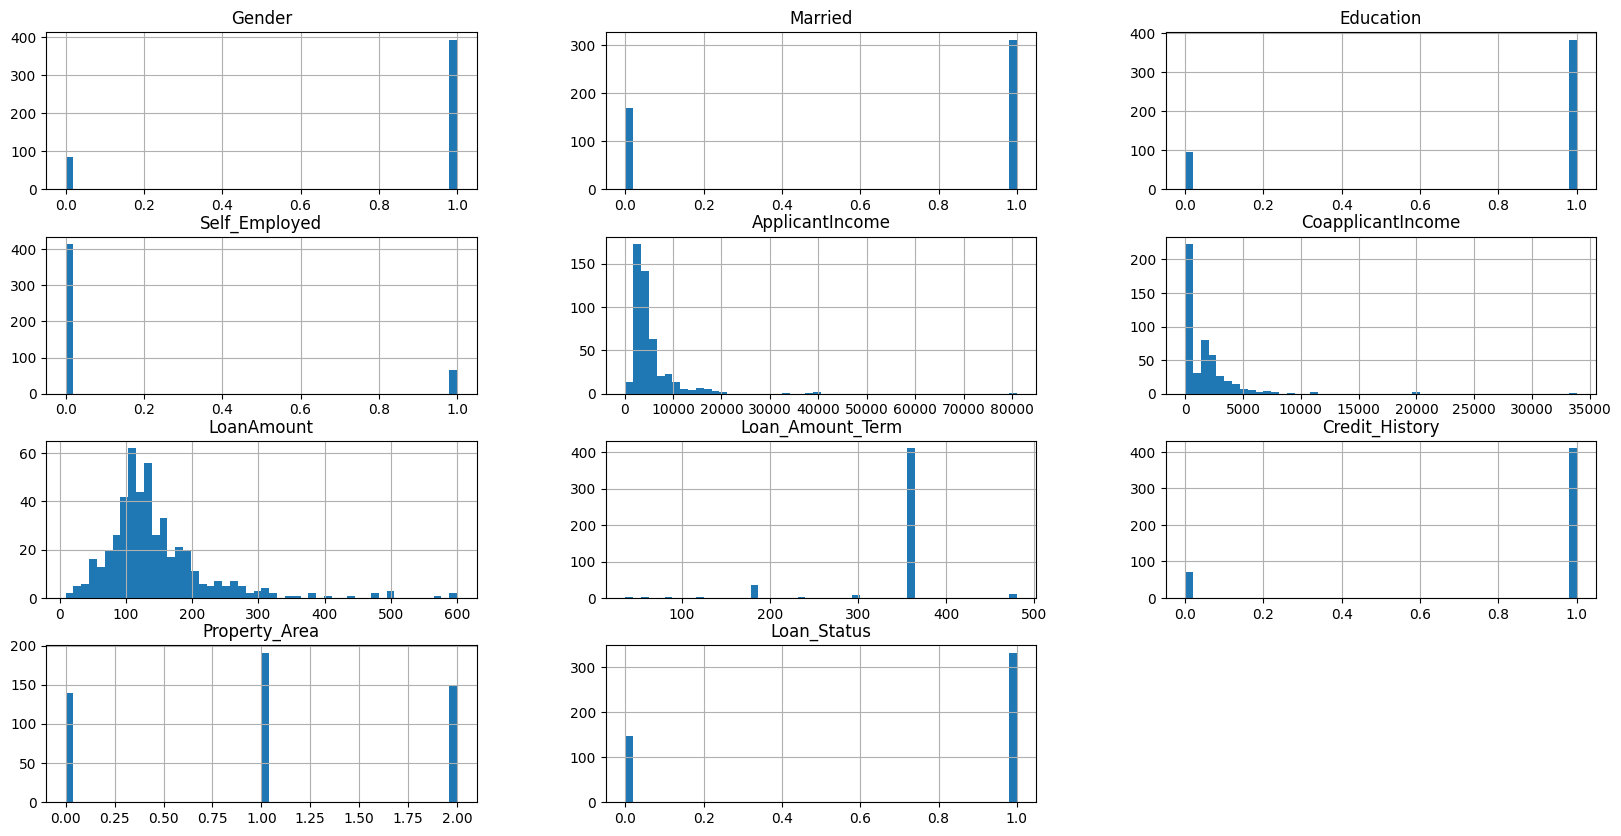

In [35]:
# Data Visualization
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,10))
plt.show()

In [36]:
df.corrwith(df.Loan_Status) # we have very good corrwith Credit History

<ipython-input-36-7fcfbeabc60f>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df.Loan_Status) # we have very good corrwith Credit History


Gender               0.064504
Married              0.112321
Education            0.068437
Self_Employed       -0.034715
ApplicantIncome     -0.043152
CoapplicantIncome   -0.049020
LoanAmount          -0.071753
Loan_Amount_Term    -0.007798
Credit_History       0.529390
Property_Area        0.031361
Loan_Status          1.000000
dtype: float64

In [39]:
# Data Cleaning and Labelling
x = df.drop(columns=['Loan_ID', "Loan_Status"] , axis=1)
y = df.Loan_Status # label

In [40]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Train-test

In [42]:
# Train-test set
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, stratify=y, random_state=30)

In [43]:
print(x.shape, x_train.shape, x_test.shape)

(480, 11) (384, 11) (96, 11)


# Training and Evaluating the model

In [44]:
classifier = svm.SVC(kernel='linear')

In [45]:
classifier.fit(x_train, y_train) # Support Vector Machine
print('')

In [47]:
# Model evaluation
x_train_prediction = classifier.predict(x_train)
data_accuracy = accuracy_score(x_train_prediction, y_train)

In [50]:
print("Accuracy data score: ", data_accuracy)

Accuracy data score:  0.7682291666666666


In [51]:
x_test_prediction = classifier.predict(x_test)
data_accuracy = accuracy_score(x_test_prediction, y_test)
print("Accuracy data score for test: ", data_accuracy) # good

Accuracy data score for test:  0.7604166666666666
